# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<font color='red'> Importing packages</font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

import warnings
warnings.filterwarnings("ignore")

<font color='red'>Creating custom dataset</font>

In [2]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# here weight parameter introduce the imbalanced to the datasets
# 0.7 here means 70% of data belongs to 0 and 30% data belongs to 1
# class_sep by what factor you want to seperate the class
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [4]:
#please don't change random state
# you need not standardize the data as it is already standardized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [8]:
# alpha : float here means lambda in Logistic Regression
# Constant that multiplies the regularization term. 

# eta0 : double means learning rate
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

# tolerence here means if current and previous loss diff is 10-3 stop the your traning
# learning_rate = 'constant' we want our alpha to be constant throught the training

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [9]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.20 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.24 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.27 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.29 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.30 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))




## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>






1.  We will be giving you some functions, please write code in that functions only.

2.  After every function, we will be giving you expected output, please make sure that you get that output. 






<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [11]:
x = np.arange(6)
x = x.reshape((2, 3))
np.zeros_like(x)

array([[0, 0, 0],
       [0, 0, 0]])

In [12]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    w = np.zeros_like(row_vector)
    #initialize bias to zero
    b = 0
    return w,b

In [13]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='red'>Grader function - 1 </font>

In [14]:
dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [15]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigmodi_z = 1/(1+np.exp(-z))
    return sigmodi_z

<font color='red'>Grader function - 2</font>

In [16]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [17]:
def logloss(y_true,y_pred):
    # by default np.log is natural logarithm i.e ln with base e
    # to comput log base 10 use np.log10(x)
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    #while dealing with numpy arrays you can use vectorized operations for quicker calculations as compared to using loops
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/
    #write your code here

    loss = -1/len(y_pred) *(np.sum((y_true*np.log10(y_pred))+((1-y_true)*np.log10(1-y_pred))))
    
    return loss

<font color='red'>Grader function - 3 </font>

In [18]:
#round off the value to 8 values
def grader_logloss(true,pred):
    loss=logloss(true,pred)
    assert(np.round(loss,6)==0.076449)
    return True
true=np.array([1,1,0,1,0])
pred=np.array([0.9,0.8,0.1,0.8,0.2])
grader_logloss(true,pred)

True

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [19]:

#make sure that the sigmoid function returns a scalar value, you can use dot function operation
# alpha here means lambda
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    
    dw = x*(y-sigmoid(np.dot(w.T,x)+b))-((alpha/N)*w)    
    return dw

<font color='red'>Grader function - 4 </font>

In [20]:
def grader_dw(x,y,w,b,alpha,N):
    
    grad_dw=gradient_dw(x,y,w,b,alpha,N)
    assert(np.round(np.sum(grad_dw),5)==4.75684)
    return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
grad_b=0.5
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [21]:
#sb should be a scalar value
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db = y - (sigmoid(np.dot(w.T,x)+b))
    return db

<font color='red'>Grader function - 5 </font>

In [22]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(np.round(grad_db,4)==-0.3714)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0.5
grad_b=0.1
grad_w=np.array([ 0.03364887,  0.03612727,  0.02786927,  0.08547455, -0.12870234,
       -0.02555288,  0.11858013,  0.13305576,  0.07310204,  0.15149245,
       -0.05708987, -0.064768  ,  0.18012332, -0.16880843, -0.27079877])
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

In [23]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)


<font color='blue'> Implementing logistic regression</font>

In [41]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train [for all data points in X_train] using pred function with updated weights
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test [for all data points in X_test] using pred function with updated weights
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process 
        # you have to return w,b , train_loss and test loss
        
    train_loss = []
    test_loss = []
    w,b = initialize_weights(X_train[0]) # Initialize the weights
    for i in range(epochs):
        print("-"*10,"epoch ",i,"-"*10)
        for j in range(len(X_train)):
            updated_weight = gradient_dw(X_train[j],y_train[j],w,b,alpha,len(X_train[j]))
            updated_bias = gradient_db(X_train[j],y_train[j],w,b)
            w = w + (eta0 * updated_weight)
            b = b + (eta0*updated_bias)
        train_pred = pred(w,b,X_train)
        train_loss_ = logloss(y_train,train_pred)
        train_loss.append(train_loss_)
            
        # Predicting outputs for x_test
        test_pred = pred(w,b,X_test)
        test_loss_ = logloss(y_test,test_pred)
        test_loss.append(test_loss_)
            
    #write your code to perform SGD


    return w,b,train_loss,test_loss

In [42]:
%%time
alpha=0.001
eta0=0.001
N=len(X_train)
epochs=20
w,b,train_loss,test_loss=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

---------- epoch  0 ----------
---------- epoch  1 ----------
---------- epoch  2 ----------
---------- epoch  3 ----------
---------- epoch  4 ----------
---------- epoch  5 ----------
---------- epoch  6 ----------
---------- epoch  7 ----------
---------- epoch  8 ----------
---------- epoch  9 ----------
---------- epoch  10 ----------
---------- epoch  11 ----------
---------- epoch  12 ----------
---------- epoch  13 ----------
---------- epoch  14 ----------
---------- epoch  15 ----------
---------- epoch  16 ----------
---------- epoch  17 ----------
---------- epoch  18 ----------
---------- epoch  19 ----------
CPU times: user 23.3 s, sys: 1.91 s, total: 25.2 s
Wall time: 23.4 s


In [43]:
#print thr value of weights w and bias b
print(w)
print(b)

[-0.41378328  0.19237889 -0.14993746  0.32621675 -0.22501775  0.58621665
 -0.42708867 -0.1002455   0.21476388  0.15544614  0.17872366 -0.01318516
 -0.06492983  0.36301564 -0.00983195]
-0.9015606084455844


In [44]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept

w-clf.coef_, b-clf.intercept_

(array([[ 0.00958363,  0.00690323, -0.0013471 , -0.01522732, -0.01683105,
          0.02605086,  0.02533616, -0.00615737,  0.00549068, -0.02539512,
         -0.01832824, -0.01740432,  0.01467387,  0.02448763, -0.03249916]]),
 array([-0.04842231]))

## <font color='red'>Goal of assignment</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in order of 10^-2

<font color='red'>Grader function - 6 </font>

In [45]:
#this grader function should return True
#the difference between custom weights and clf.coef_ should be less than or equal to 0.05
def differece_check_grader(w,b,coef,intercept):
    val_array=np.abs(np.array(w-coef))
    assert(np.all(val_array<=0.05))
    print('The custom weights are correct')
    return True
differece_check_grader(w,b,clf.coef_,clf.intercept_)   

The custom weights are correct


True

<font color='blue'>Plot your train and test loss vs epochs </font>

plot epoch number on X-axis and loss on Y-axis and make sure that the curve is converging

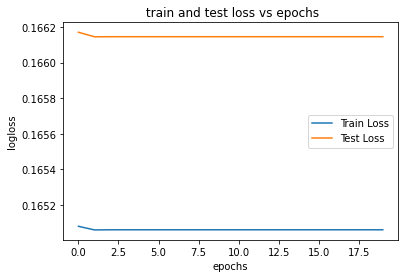

In [46]:
import matplotlib.pyplot as plt

plt.plot(range(epochs),train_loss,label = "Train Loss")
plt.plot(range(epochs),test_loss,label = 'Test Loss')
plt.title(" train and test loss vs epochs")
plt.xlabel("epochs")
plt.ylabel("logloss")
plt.legend()
plt.show()